# Random Forest

<b>Reference</b>

- https://www.datacamp.com/community/tutorials/random-forests-classifier-python
- https://machinelearningmastery.com/random-forest-ensemble-in-python/
- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
- https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

- https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html
- 

## Load Data

In [5]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Prepare Data

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## Create Model

In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

## Evaluate

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [11]:
# Now you can predict which type of flower it is.
clf.predict([[3, 5, 4, 2]])

# Here, 2 indicates the flower type Virginica.


array([1])

## Finding Important Features 

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.445975
petal length (cm)    0.414852
sepal length (cm)    0.106556
sepal width (cm)     0.032618
dtype: float64

### Visualize the Feature Importance

No handles with labels found to put in legend.


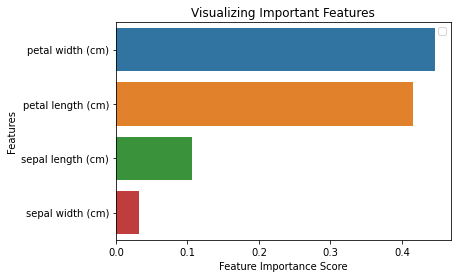

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test


from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


## Credit Use Case

In [15]:
import pandas as pd

df_churn_data_0 = pd.read_csv(r"C:\Users\Artist of Analytics\ArtistofAnalytics\Algorithms\Random_Forest\credit_data_modified.csv")

df_churn_data_1 = df_churn_data_0.iloc[: , 1:]
df_churn_data_1.head()

,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Int.l.Plan,VMail.Plan,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [16]:
df_churn_data_0.columns
df_churn_data_1.columns

Index(['VMail.Message', 'Day.Mins', 'Day.Calls', 'Day.Charge', 'Eve.Mins',
       'Eve.Calls', 'Eve.Charge', 'Night.Mins', 'Night.Calls', 'Night.Charge',
       'Intl.Mins', 'Intl.Calls', 'Intl.Charge', 'CustServ.Calls',
       'Int.l.Plan', 'VMail.Plan', 'Churn'],
      dtype='object')

In [17]:
#split dataset in features and target variable

X = df_churn_data_1.drop("Churn", axis=1)
y = df_churn_data_1["Churn"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951


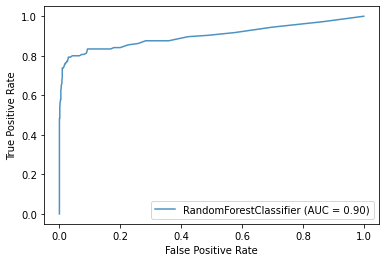

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
clf_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)

plt.show()
# ValueError: RandomForestClassifier should be a binary classifier

## Hyper Parameter Tuning

In [20]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [21]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.8s finished


Successfully executed in 0.4 mins
Best: 0.957571 using {'n_estimators': 1000}
0.955855 (0.008720) with: {'n_estimators': 100}
0.956713 (0.006798) with: {'n_estimators': 200}
0.954997 (0.007403) with: {'n_estimators': 300}
0.956284 (0.009811) with: {'n_estimators': 400}
0.956285 (0.009713) with: {'n_estimators': 500}
0.954141 (0.007344) with: {'n_estimators': 600}
0.956283 (0.007353) with: {'n_estimators': 700}
0.956710 (0.005797) with: {'n_estimators': 800}
0.955854 (0.006837) with: {'n_estimators': 900}
0.957571 (0.009501) with: {'n_estimators': 1000}


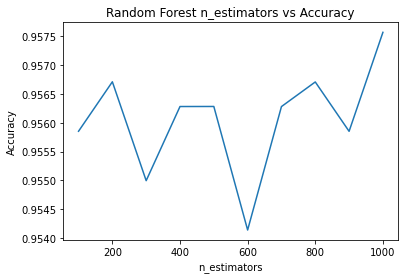

In [23]:

from sklearn.model_selection import StratifiedKFold

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import time
# Initiate start time
start_time = time.time()

# Parameters
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 
param_grid = dict(n_estimators=n_estimators)

#Cross Validation 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
#Model creation with GridSearchCV
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose = 1)
#Fit the Model
grid_result = grid_search.fit(X_train,y_train)

# Check Execution time
end_time = time.time()
execution_time = (end_time - start_time)
print("Successfully executed in", round(execution_time/60,1), "mins")

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# Visualization
import matplotlib
from matplotlib import pyplot
# plot the results
pyplot.plot(n_estimators, means)
pyplot.title("Random Forest n_estimators vs Accuracy")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Accuracy')
pyplot.show()  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.9s finished


Successfully executed in 0.0 mins
Best: 0.932702 using {'max_depth': 6}
0.856837 (0.001560) with: {'max_depth': 2}
0.882552 (0.005199) with: {'max_depth': 3}
0.902277 (0.007548) with: {'max_depth': 4}
0.924127 (0.006357) with: {'max_depth': 5}
0.932702 (0.008107) with: {'max_depth': 6}


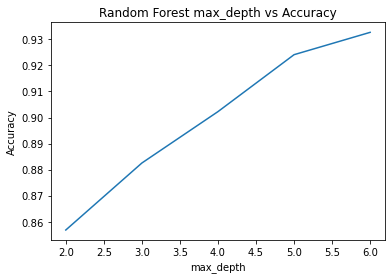

In [24]:

from sklearn.model_selection import StratifiedKFold

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import time
# Initiate start time
start_time = time.time()

# Parameters
max_depth = [2,3,4,5,6]
param_grid = dict(max_depth=max_depth)

#Cross Validation 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
#Model creation with GridSearchCV
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose = 1)
#Fit the Model
grid_result = grid_search.fit(X_train,y_train)

# Check Execution time
end_time = time.time()
execution_time = (end_time - start_time)
print("Successfully executed in", round(execution_time/60,1), "mins")

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# Visualization
import matplotlib
from matplotlib import pyplot
# plot the results
pyplot.plot(max_depth, means)
pyplot.title("Random Forest max_depth vs Accuracy")
pyplot.xlabel('max_depth')
pyplot.ylabel('Accuracy')
pyplot.show()  

In [3]:
!pip install "jupyter-kite<2.0.0"
!jupyter labextension install "@kiteco/jupyterlab-kite"


  Created wheel for jupyter-kite: filename=jupyter_kite-1.2.0-py3-none-any.whl size=43033 sha256=405c241ccb86460a5605b1e722d455de5c982a1608c11e2d400d7b23476a01a5
  Stored in directory: c:\users\artist of analytics\appdata\local\pip\cache\wheels\c0\5c\ff\726fda8fc6ae2c0b8115b9573127bebc8d99f4639e406c2a6a
Successfully built jupyter-kite
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\conda_tmp\jupyterlab-debug-hl79auc9.log
